In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import re
from functools import reduce
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

y_ax="PLAC-seq signal"

In [26]:
element_positive = pd.read_csv(r'C:\Users\libin\UCSF\MECP2\compare_element\1206_new_element_set\PLAC\total_positive_elements_intersect_interactions.tab',
                                              sep="\t", names=['target_chr', 'target_start', 'target_end', 'count_pos', 'expected', 'fdr', "e_chr", "e_start", "e_end"])
element_positive["length"] = element_positive["e_end"] - element_positive["e_start"]
# agg on elements
element_positive_agg_ele = element_positive.groupby(["e_chr", "e_start", "e_end"], as_index=False).agg(sum)
element_positive_agg_ele = element_positive_agg_ele[["e_chr", "e_start", "e_end",'count_pos']]


In [27]:
element_negative = pd.read_csv(r'C:\Users\libin\UCSF\MECP2\compare_element\1206_new_element_set\PLAC\total_negative_elements_intersect_interactions.tab',
                                              sep="\t", names=['target_chr', 'target_start', 'target_end', 'count_neg', 'expected', 'fdr_element_negative', "e_chr", "e_start", "e_end"])
element_negative["length"] = element_negative["e_end"] - element_negative["e_start"]
# agg on elements
element_negative_agg_ele = element_negative.groupby(["e_chr", "e_start", "e_end"], as_index=False).agg(sum)
element_negative_agg_ele = element_negative_agg_ele[["e_chr", "e_start", "e_end",'count_neg']]


In [28]:
element_all = reduce(lambda x, y: pd.merge(x, y, on = ["e_chr", "e_start", "e_end"], how="outer"), 
                     [element_negative_agg_ele, element_positive_agg_ele])
element_all_melt = pd.melt(element_all, value_vars=["count_pos", "count_neg"], value_name=y_ax, var_name="")

In [29]:
print(element_all[["count_pos", "count_neg"]].describe())
stats.ks_2samp(element_all["count_pos"], element_all["count_neg"])

       count_pos   count_neg
count  19.000000  106.000000
mean    7.842105    8.858491
std     7.065276   15.688296
min     1.000000    1.000000
25%     2.500000    1.000000
50%     5.000000    3.000000
75%    11.500000    8.000000
max    26.000000  103.000000


Ks_2sampResult(statistic=0.696, pvalue=1.274046616087269e-27)

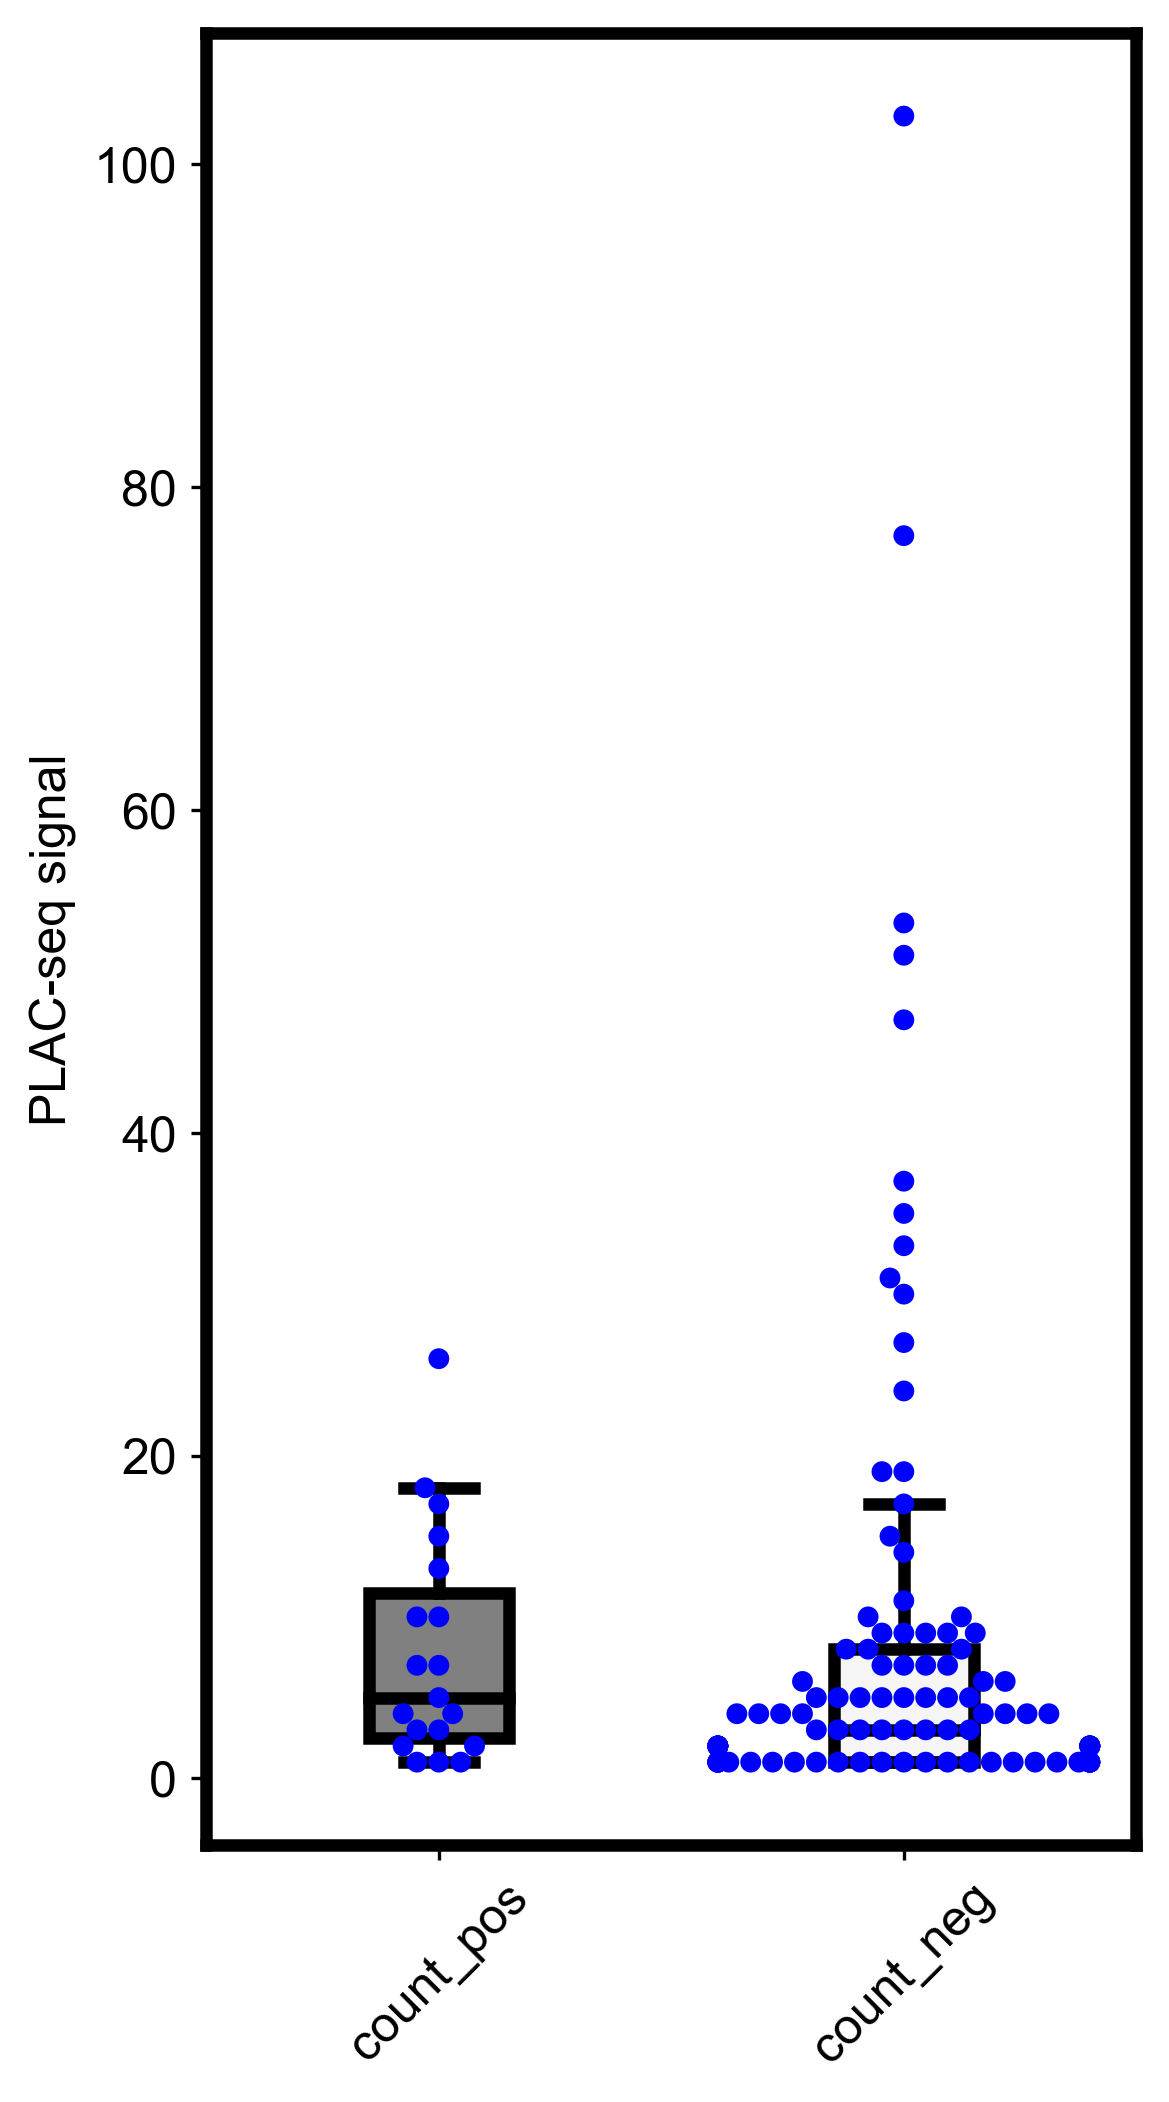

In [30]:

ax = plt.figure(figsize=(4,8))
plt.ylabel('', fontsize=12,fontname="Arial")
plt.xticks(rotation=45, fontname="Arial", fontsize=12)
plt.yticks(fontname="Arial", fontsize=12)
ax=sns.boxplot(x="", y=y_ax, data=element_all_melt, palette=["gray", "whitesmoke"], showfliers = False, width=[0.3], boxprops=dict(edgecolor='black',linewidth=3))
plt.setp(ax.lines, color="black",linewidth=3)
plt.setp(ax.spines.values(), color="black",linewidth=3)
sns.swarmplot(x="", y=y_ax, data=element_all_melt, color="blue", size=5)
plt.savefig(r'C:/Users/libin/UCSF/MECP2/compare_element/PLAC_48_1107.pdf', transparent=True)   

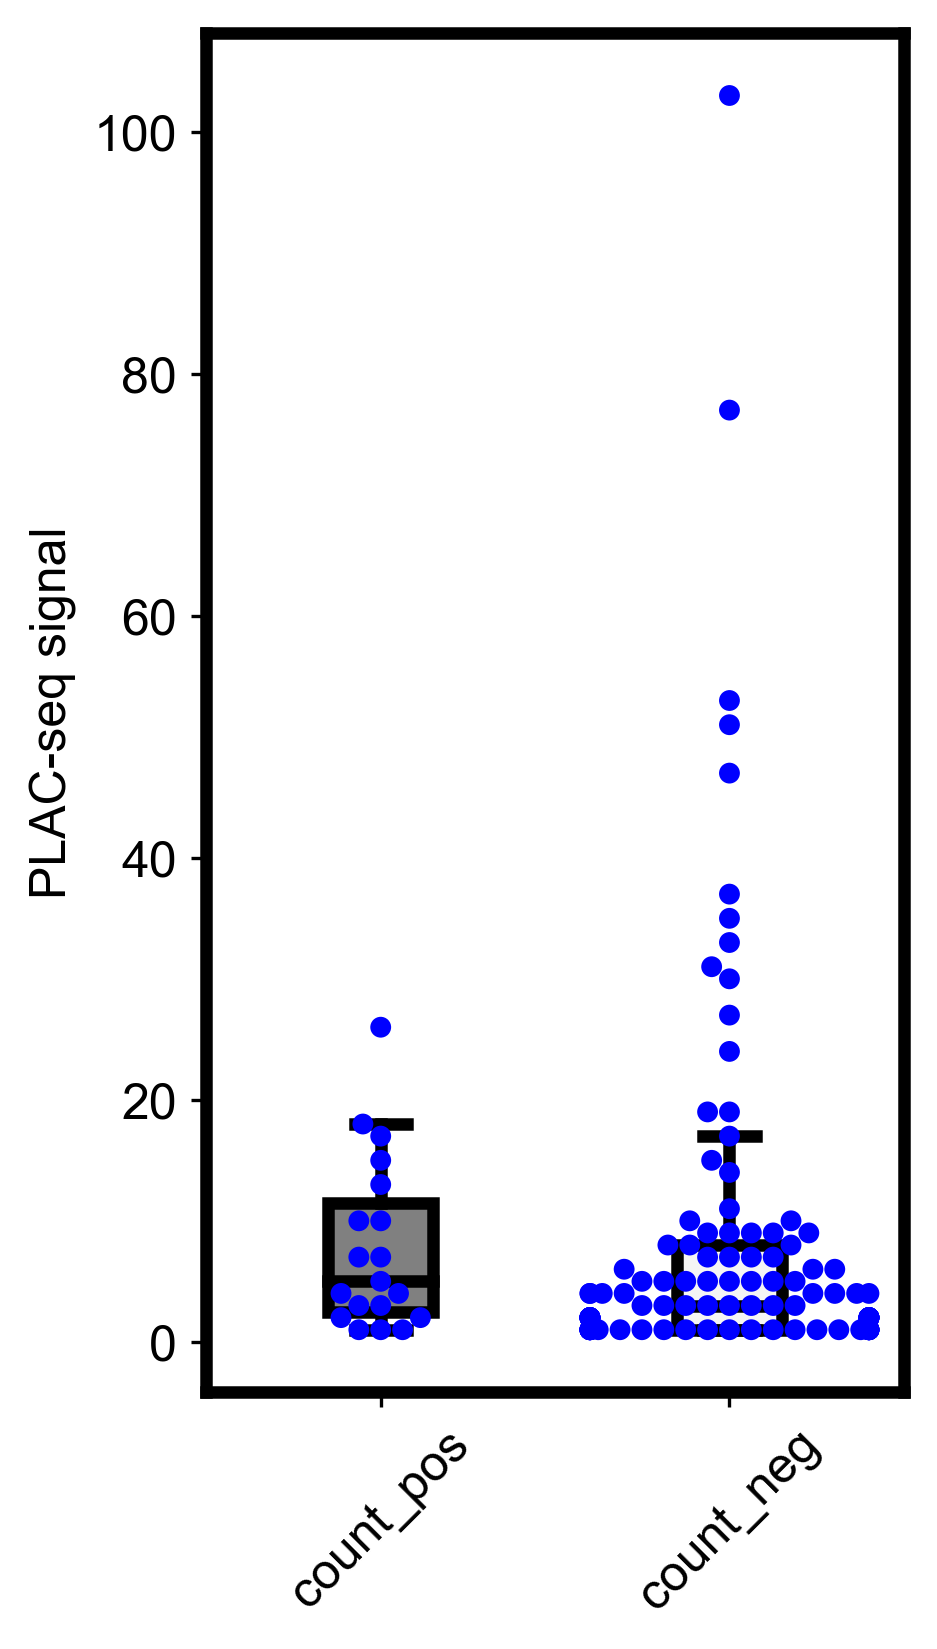

In [31]:

ax = plt.figure(figsize=(3,6))
plt.ylabel('', fontsize=12,fontname="Arial")
plt.xticks(rotation=45, fontname="Arial", fontsize=12)
plt.yticks(fontname="Arial", fontsize=12)
ax=sns.boxplot(x="", y=y_ax, data=element_all_melt, palette=["gray", "whitesmoke"], showfliers = False, width=[0.3], boxprops=dict(edgecolor='black',linewidth=3))
plt.setp(ax.lines, color="black",linewidth=3)
plt.setp(ax.spines.values(), color="black",linewidth=3)
sns.swarmplot(x="", y=y_ax, data=element_all_melt, color="blue", size=5)
plt.savefig(r'C:/Users/libin/UCSF/MECP2/compare_element/PLAC_36_1107.pdf', transparent=True)   